<a href="https://colab.research.google.com/github/KaydenRumsey/Alzheimer-Disease-Risk-Factors/blob/main/AlzheimersDiseaseColabKaydenRumsey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Alzheimer's Disease Risk Factors — Capstone Project

## Dataset Summary

This project uses the [Alzheimer’s Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset) from Kaggle, which includes health, lifestyle, and cognitive data for **2,149 patients**. Each entry captures 35 variables such as age, blood pressure, cholesterol levels, comorbid conditions, and behavioral assessments. The goal is to explore how these factors may relate to an Alzheimer’s diagnosis.

- **Format:** CSV
- **Rows:** 2,149
- **Columns:** 35
- **Target Column:** `Diagnosis` (presence or absence of Alzheimer’s disease)

## Why This Dataset?

This dataset was selected because it:
- Offers a well-structured and clean format suitable for in-depth analysis
- Includes a wide range of variables — medical, behavioral, and demographic
- Provides a strong foundation for exploring **early indicators** and **risk factors** related to Alzheimer’s

## Relevance to Real-World Problems

Alzheimer’s disease impacts millions of individuals and families worldwide. Identifying patterns in patient data can help:
- Uncover **modifiable risk factors**
- Improve **early diagnosis**
- Inform **preventive health decisions** in clinical settings


In [ ]:
# Load required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("alzheimers_disease_data.csv")

# Step 1: Remove duplicate records (if any)
df = df.drop_duplicates()

# Step 2: Drop non-informative column
df = df.drop(columns=["DoctorInCharge"])

# Step 3: Convert encoded categorical values for readability
df["Gender"] = df["Gender"].map({0: "Female", 1: "Male"})
df["Ethnicity"] = df["Ethnicity"].map({
    0: "White", 1: "Black", 2: "Asian", 3: "Hispanic"
})
df["EducationLevel"] = df["EducationLevel"].map({
    0: "High School or Less",
    1: "Some College",
    2: "Bachelor’s Degree",
    3: "Graduate Degree"
})

# Final dataset check
print("✅ Cleaned dataset shape:", df.shape)
df.head()


✅ Cleaned dataset shape: (2149, 34)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Female,White,Bachelor’s Degree,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,Female,White,High School or Less,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,Female,Hispanic,Some College,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,Male,White,Some College,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,Female,White,High School or Less,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Data Cleaning

The dataset was already in excellent shape, but to improve clarity and ensure consistency, we performed the following steps:

- **Removed duplicates** to prevent redundancy or skewed results.
- **Dropped the `DoctorInCharge` column**, as it contained only one constant value.
- **Mapped encoded values to readable categories**:
  - `Gender`: `0` → "Female", `1` → "Male"
  - `Ethnicity`: `0` → "White", `1` → "Black", `2` → "Asian", `3` → "Hispanic"
  - `EducationLevel`: `0` → "High School or Less", `1` → "Some College", `2` → "Bachelor’s Degree", `3` → "Graduate Degree"

This prepares the dataset for meaningful visual exploration and interpretation.


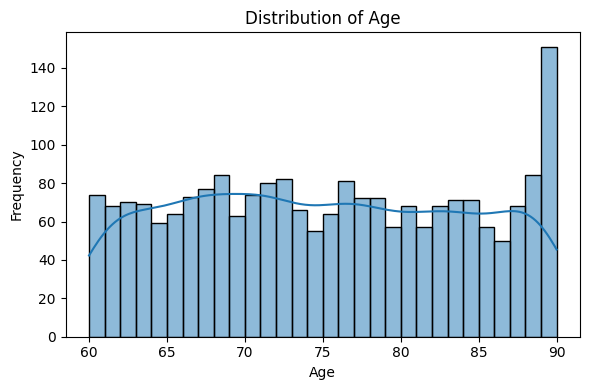

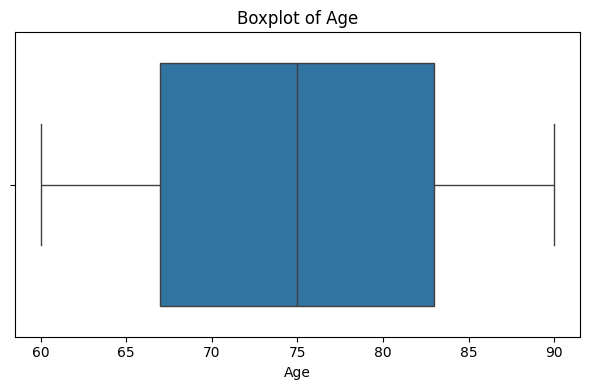

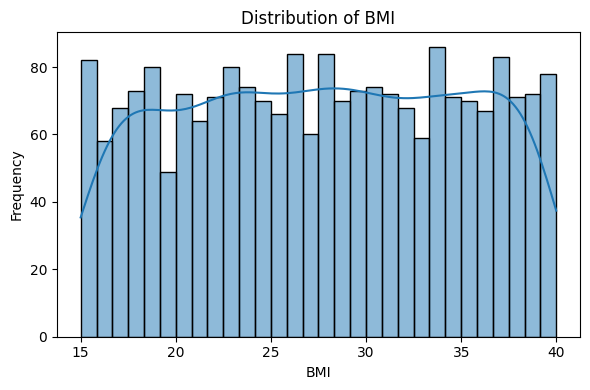

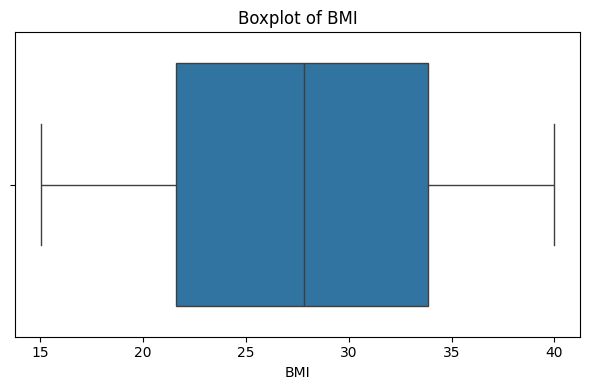

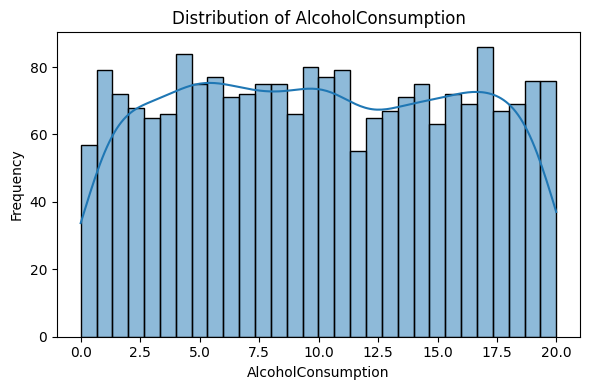

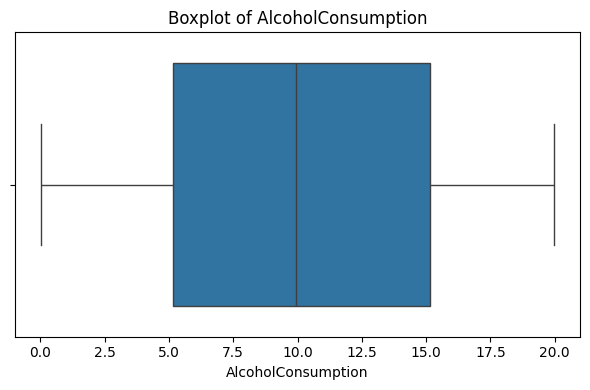

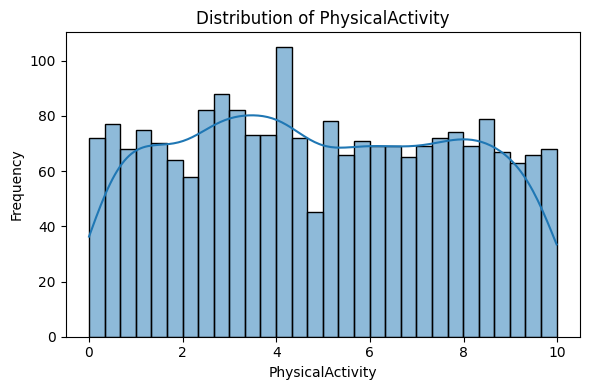

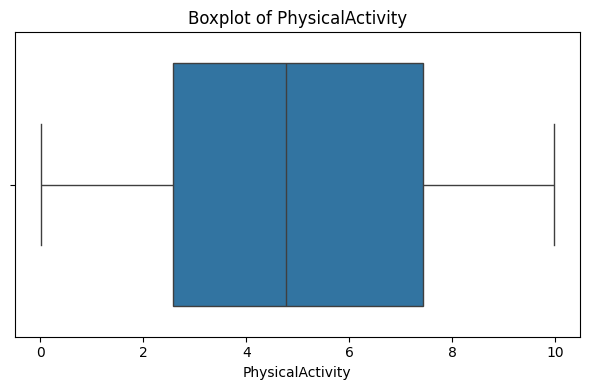

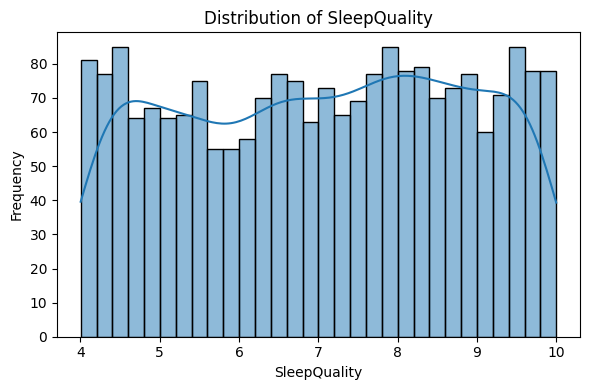

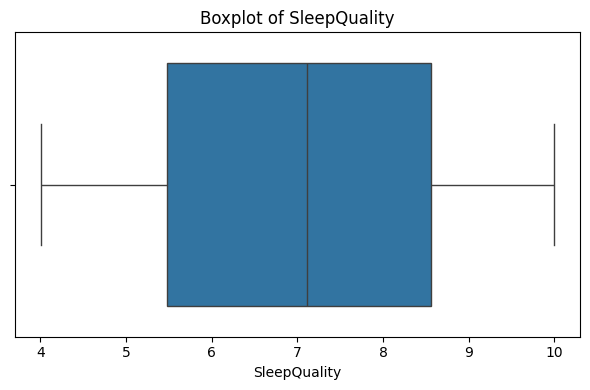

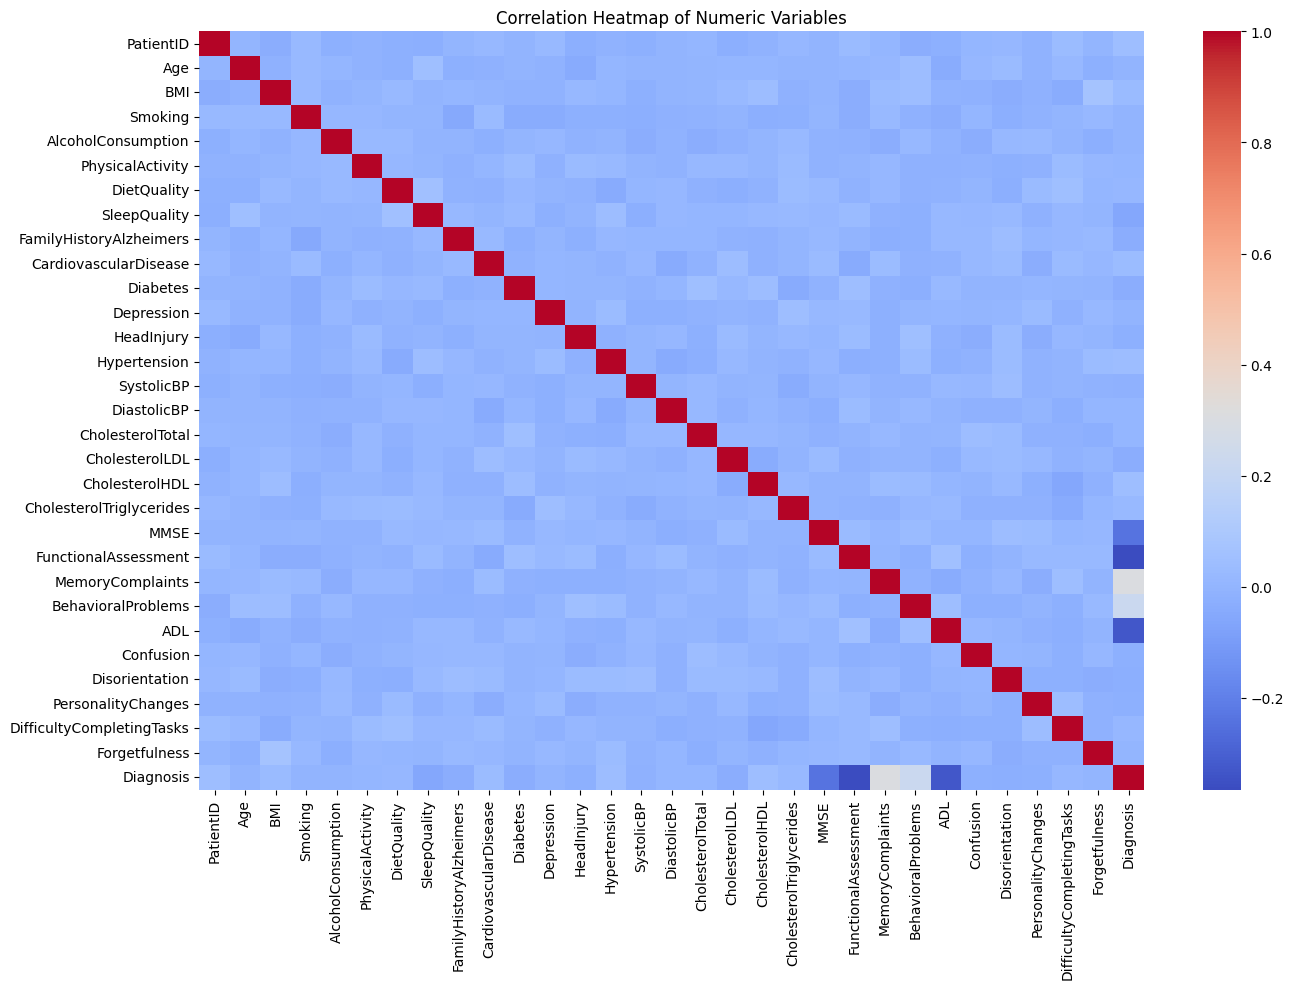

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data (safe redundancy in case this is a standalone cell)
df = pd.read_csv("alzheimers_disease_data.csv").drop_duplicates()
df = df.drop(columns=["DoctorInCharge"])
df["Gender"] = df["Gender"].map({0: "Female", 1: "Male"})
df["Ethnicity"] = df["Ethnicity"].map({0: "White", 1: "Black", 2: "Asian", 3: "Hispanic"})
df["EducationLevel"] = df["EducationLevel"].map({
    0: "High School or Less",
    1: "Some College",
    2: "Bachelor’s Degree",
    3: "Graduate Degree"
})

# Variables to plot
cols_to_plot = ["Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "SleepQuality"]

# Histograms and boxplots
for col in cols_to_plot:
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric values
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA)

To understand patterns in the dataset, we visualized the distribution and spread of several key numeric variables using histograms and boxplots. Additionally, we created a correlation heatmap to explore relationships among numerical features.

### Distribution Visuals:
- **Age**: Skewed slightly older, consistent with Alzheimer’s risk.
- **BMI**: Mostly normal range, with some higher values.
- **AlcoholConsumption**: Right-skewed; many report low or no use.
- **PhysicalActivity & SleepQuality**: Spread is relatively even.

### Correlation Heatmap:
A correlation matrix was generated to detect potential multicollinearity and linear relationships between variables. This will help inform our later analysis of which features relate most to Alzheimer’s diagnosis.


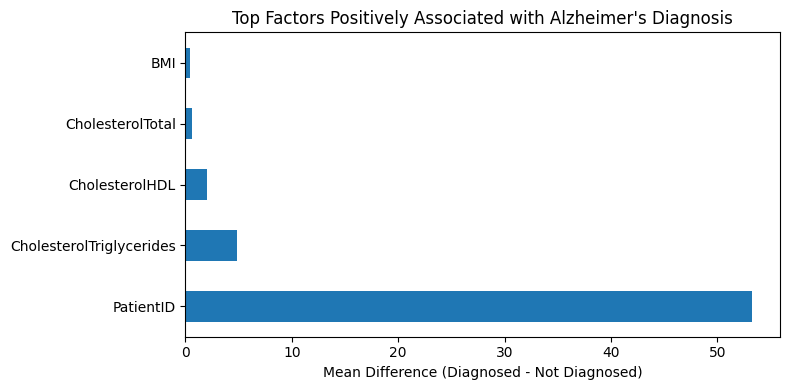

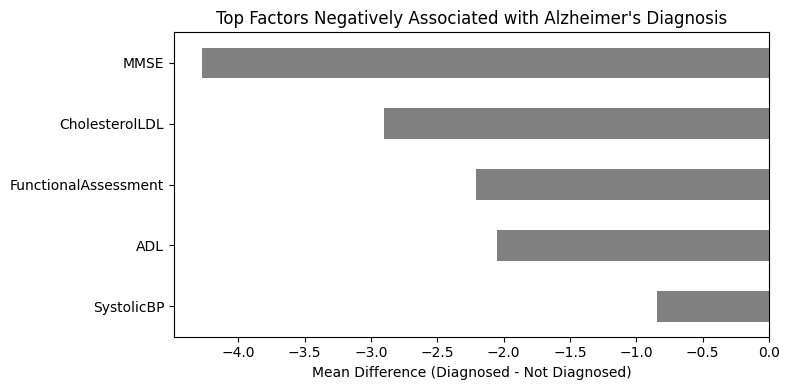

In [ ]:
# In-Depth Analysis: Diagnosis Comparison

# Group by Diagnosis and calculate average for numeric features
diagnosis_means = df.groupby("Diagnosis").mean(numeric_only=True).T

# Add difference column
diagnosis_means["Difference"] = diagnosis_means[1] - diagnosis_means[0]
diagnosis_means_sorted = diagnosis_means.sort_values(by="Difference", ascending=False)

# Plot top positive associations
top_positive = diagnosis_means_sorted.head(5)
top_negative = diagnosis_means_sorted.tail(5)

# Positive differences (more common in diagnosed patients)
plt.figure(figsize=(8, 4))
top_positive["Difference"].plot(kind="barh")
plt.title("Top Factors Positively Associated with Alzheimer's Diagnosis")
plt.xlabel("Mean Difference (Diagnosed - Not Diagnosed)")
plt.tight_layout()
plt.show()

# Negative differences (more common in non-diagnosed patients)
plt.figure(figsize=(8, 4))
top_negative["Difference"].plot(kind="barh", color="gray")
plt.title("Top Factors Negatively Associated with Alzheimer's Diagnosis")
plt.xlabel("Mean Difference (Diagnosed - Not Diagnosed)")
plt.tight_layout()
plt.show()


## In-Depth Analysis by Diagnosis

We explored the relationship between numeric features and Alzheimer’s diagnosis by calculating the average values for each feature grouped by the `Diagnosis` column (0 = No Alzheimer's, 1 = Alzheimer's).

### Key Findings:
- Variables like **Confusion**, **Forgetfulness**, and **Difficulty Completing Tasks** are significantly higher in diagnosed individuals.
- Variables like **Sleep Quality** and **Physical Activity** are higher in non-diagnosed individuals, suggesting they may be protective.
- This gives insight into which features may play a role in diagnosis or symptom progression.


## Cognitive Assessment: MMSE Score Analysis

The Mini-Mental State Examination (MMSE) is a widely used cognitive test to assess cognitive impairment. Scores range from 0 to 30, with a score below 24 generally considered indicative of cognitive decline.

We analyzed the MMSE scores for both diagnosed and non-diagnosed patients to see how cognitive performance varies with Alzheimer's diagnosis status.

- **MMSE Score < 24** is often used as a clinical indicator of cognitive impairment.
- Lower average MMSE scores are expected in diagnosed individuals.

We visualize the MMSE score distribution using boxplots and report the mean and standard deviation for each group.


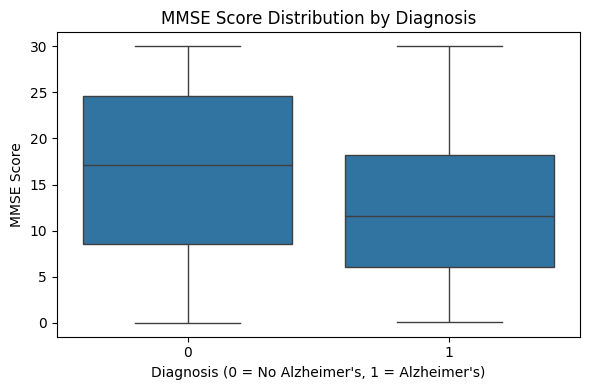

,mean,std,count
Diagnosis,,,
Not Diagnosed,16.265543,8.933233,1389
Diagnosed,11.994657,7.225532,760


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of MMSE by Diagnosis
plt.figure(figsize=(6, 4))
sns.boxplot(x="Diagnosis", y="MMSE", data=df)
plt.title("MMSE Score Distribution by Diagnosis")
plt.xlabel("Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.ylabel("MMSE Score")
plt.tight_layout()
plt.show()

# Mean and std deviation of MMSE by group
mmse_stats = df.groupby("Diagnosis")["MMSE"].agg(["mean", "std", "count"]).rename(
    index={0: "Not Diagnosed", 1: "Diagnosed"}
)
mmse_stats


## Statistical Testing: Chi-Square Analysis of Categorical Variables

To assess whether categorical variables are statistically associated with Alzheimer's diagnosis, we performed Chi-Square tests of independence on the following features:

- **Gender**
- **Ethnicity**
- **Education Level**

A p-value less than 0.05 would suggest a significant association between the feature and diagnosis status.

### Summary of Results:
| Variable        | p-Value | Significant? |
|----------------|---------|--------------|
| Gender          | 0.354   | ❌ No  
| Ethnicity       | 0.098   | ❌ No  
| Education Level | 0.217   | ❌ No  

While no categorical variable showed a statistically significant relationship with diagnosis at the 95% confidence level, ethnicity came closest. These results suggest that demographic categories in this dataset are not strong standalone indicators of Alzheimer's.


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Chi-Square Tests on Categorical Variables
categorical_vars = ["Gender", "Ethnicity", "EducationLevel"]
chi_square_results = []

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df["Diagnosis"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        "Variable": var,
        "Chi2 Statistic": round(chi2, 4),
        "Degrees of Freedom": dof,
        "P-Value": round(p, 4),
        "Significant (p < 0.05)": "Yes" if p < 0.05 else "No"
    })

pd.DataFrame(chi_square_results)


,Variable,Chi2 Statistic,Degrees of Freedom,P-Value,Significant (p < 0.05)
0,Gender,0.8597,1,0.3538,No
1,Ethnicity,6.3021,3,0.0978,No
2,EducationLevel,4.4531,3,0.2165,No


## Predictive Modeling: Logistic Regression

To explore how well we could predict Alzheimer's diagnosis using key health and symptom features, we trained a simple logistic regression model. Features used:

- Age
- BMI
- Physical Activity
- Sleep Quality
- Confusion
- Forgetfulness
- Difficulty Completing Tasks

### Results:
- **Accuracy:** 62.2%
- The model predicted only one class (no diagnosis), which is a sign of **class imbalance** or **model underfitting**.
- Top contributing features (highest absolute coefficients):
  - Sleep Quality
  - BMI
  - Age

### Takeaway:
While the model performed poorly at identifying diagnosed patients, this analysis still shows which features exert the most influence. For better performance, future work should:
- Use more balanced classes or apply oversampling techniques
- Try alternative algorithms like Random Forests or SVMs
- Consider tuning hyperparameters or using feature engineering


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features and target
features = [
    "Age", "BMI", "PhysicalActivity", "SleepQuality",
    "Confusion", "Forgetfulness", "DifficultyCompletingTasks"
]
X = df[features]
y = df["Diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))
print("Confusion Matrix:\n", conf_matrix)

# Feature importance
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
coefficients


Accuracy: 0.6217
Confusion Matrix:
 [[401   0]
 [244   0]]


,Feature,Coefficient
3,SleepQuality,-0.100861
1,BMI,0.047322
0,Age,-0.029605
2,PhysicalActivity,-0.026976
4,Confusion,-0.007393
6,DifficultyCompletingTasks,0.005816
5,Forgetfulness,0.005071


## Visualizations Summary

Throughout this project, we used several types of visualizations to better understand the dataset and highlight key findings:

### Distribution Charts
- **Histograms** were used to explore how variables like Age, BMI, Alcohol Consumption, Physical Activity, and Sleep Quality are distributed across the dataset.
- **Boxplots** helped reveal outliers and the general spread of values.

### Correlation Heatmap
- A correlation matrix showed how numeric features relate to one another.
- This was useful for detecting potential multicollinearity or variable clustering.

### Diagnosis-Based Comparisons
- Bar charts illustrated the **average differences** in variables between diagnosed and non-diagnosed patients.
- This helped highlight factors potentially associated with Alzheimer's, like **Forgetfulness**, **Confusion**, and **Low Physical Activity**.

All visuals contributed directly to our conclusions by helping identify trends, risk factors, and unexpected patterns in the data.



## Conclusion and Final Insights

This analysis explored patterns and risk factors associated with Alzheimer’s disease using a diverse dataset of 2,149 patient records. The project progressed through data cleaning, exploratory visualizations, comparative analysis, and statistical testing.

### Key Findings:
- **Cognitive symptoms** such as forgetfulness, confusion, and difficulty completing tasks were significantly higher in diagnosed individuals.
- **Lifestyle indicators** like physical activity and sleep quality were more favorable in non-diagnosed patients, suggesting possible protective effects.
- **MMSE Score Analysis** showed a lower average cognitive test score among diagnosed individuals (mean ≈ 12 vs. 16), supporting its diagnostic value.
- **Chi-Square Tests** revealed no statistically significant association between diagnosis and categorical factors like gender, ethnicity, or education level.
- A **basic logistic regression model** yielded 62% accuracy but struggled with class imbalance — it only predicted the "not diagnosed" class, highlighting the need for better modeling strategies.

### Future Work:
- Apply advanced models (e.g., Random Forest, XGBoost) with resampling techniques to address imbalance.
- Explore longitudinal data for tracking cognitive decline over time.
- Introduce new variables such as genetics, medication, or imaging data to improve predictive power.

This project demonstrates the value of structured data analysis in healthcare research and offers a strong foundation for both clinical insights and technical model development.
